<a href="https://colab.research.google.com/github/brillianita/Backend-Express/blob/main/loadprofilecluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Data**

In [11]:
ROOT_PATH = "drive/MyDrive/Skripsi/DATA/"
data_dil = pd.read_csv(ROOT_PATH + "Data_DIL_Selection.csv")
data_dec = pd.read_csv(ROOT_PATH + "LPF_168_ID_DES_2022.csv", encoding="cp437")
data_faktor_kali = pd.read_excel(ROOT_PATH + "Daftar Idpel gardu_Solved.xlsx")
data_saldo_dil = pd.read_csv(ROOT_PATH + "Data_Saldo_DIL_Selection.csv")

# **Cleaning Data**

In [30]:
preprocess_dil_df = data_dil.copy()
preprocess_dec_df = data_dec.copy()
preprocess_faktor_kali_df = data_faktor_kali.copy()
preprocess_data_saldo_dil_df = data_saldo_dil.copy()

In [31]:
preprocess_dec_df = pd.merge(preprocess_dil_df, preprocess_dec_df, left_on='IDPEL', right_on='LOCATION_CODE', how='inner')
preprocess_dec_df = pd.merge(preprocess_faktor_kali_df, preprocess_dec_df, on='IDPEL', how='inner')
preprocess_dec_df = pd.merge(preprocess_data_saldo_dil_df, preprocess_dec_df, on='IDPEL', how='inner')

In [32]:
preprocess_dec_df=preprocess_dec_df[['IDPEL', 'NAMA', 'READ_DATE', 'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3', 'Faktor Kali', 'NOMOR_GARDU', 'KAPASITAS_TRAFO', 'DAYA']]
preprocess_dec_df

,IDPEL,NAMA,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,Faktor Kali,NOMOR_GARDU,KAPASITAS_TRAFO,DAYA
0,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:00:00,1.213087,0.951574,1.079308,60,GD321110816,200.0,197000
1,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:15:00,1.176808,0.951574,1.179831,60,GD321110816,200.0,197000
2,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:30:00,1.185878,0.961400,1.175296,60,GD321110816,200.0,197000
3,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:45:00,1.080819,0.922098,1.203262,60,GD321110816,200.0,197000
4,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 01:00:00,1.239541,0.956109,1.220646,60,GD321110816,200.0,197000
...,...,...,...,...,...,...,...,...,...,...
458505,321700002151,ASRAMA SUSTERAN,2022-12-31 22:45:00,11.038718,14.039314,24.140818,1,GD321610005,100.0,33000
458506,321700002151,ASRAMA SUSTERAN,2022-12-31 23:00:00,12.765761,12.750645,23.350988,1,GD321610005,100.0,33000
458507,321700002151,ASRAMA SUSTERAN,2022-12-31 23:15:00,12.342504,8.166611,21.189350,1,GD321610005,100.0,33000
458508,321700002151,ASRAMA SUSTERAN,2022-12-31 23:30:00,10.887554,8.865742,20.766092,1,GD321610005,100.0,33000


In [33]:
preprocess_dec_df['CURRENT_L1']=preprocess_dec_df['CURRENT_L1'].round(3)*preprocess_dec_df['Faktor Kali']
preprocess_dec_df['CURRENT_L2']=preprocess_dec_df['CURRENT_L2'].round(3)*preprocess_dec_df['Faktor Kali']
preprocess_dec_df['CURRENT_L3']=preprocess_dec_df['CURRENT_L3'].round(3)*preprocess_dec_df['Faktor Kali']
preprocess_dec_df['ARUS_PERFASA_MAX']=(preprocess_dec_df['DAYA']/(220*3)).round(3)

In [34]:
preprocess_dec_df

,IDPEL,NAMA,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,Faktor Kali,NOMOR_GARDU,KAPASITAS_TRAFO,DAYA,ARUS_PERFASA_MAX
0,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:00:00,72.780,57.120,64.740,60,GD321110816,200.0,197000,298.485
1,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:15:00,70.620,57.120,70.800,60,GD321110816,200.0,197000,298.485
2,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:30:00,71.160,57.660,70.500,60,GD321110816,200.0,197000,298.485
3,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:45:00,64.860,55.320,72.180,60,GD321110816,200.0,197000,298.485
4,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 01:00:00,74.400,57.360,73.260,60,GD321110816,200.0,197000,298.485
...,...,...,...,...,...,...,...,...,...,...,...
458505,321700002151,ASRAMA SUSTERAN,2022-12-31 22:45:00,11.039,14.039,24.141,1,GD321610005,100.0,33000,50.000
458506,321700002151,ASRAMA SUSTERAN,2022-12-31 23:00:00,12.766,12.751,23.351,1,GD321610005,100.0,33000,50.000
458507,321700002151,ASRAMA SUSTERAN,2022-12-31 23:15:00,12.343,8.167,21.189,1,GD321610005,100.0,33000,50.000
458508,321700002151,ASRAMA SUSTERAN,2022-12-31 23:30:00,10.888,8.866,20.766,1,GD321610005,100.0,33000,50.000


## Handling Outliers

In [35]:
preprocess_dec_outliers_df = preprocess_dec_df.copy()

In [36]:
# detect outliers function
def detect_outliers(group, current, arus_perfasa_max):
    q1 = group[current].quantile(0.25)
    q3 = group[current].quantile(0.75)
    qr = q3 - q1
    lower_bound = q1 - (1.5 * qr)
    upper_bound = q3 + (1.5 * qr)
    # print(group[arus_perfasa_max])
    group[current] = group[current].apply(lambda x: q1 if x == 0.0 else x)
    # group[current] = group[current].apply(lambda x: q3 if group[arus_perfasa_max] > 5 else x)
    group[current] = group.apply(lambda x: q3 if x[current] > x[arus_perfasa_max] else x[current], axis=1)

    return group

In [37]:
preprocess_dec_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458510 entries, 0 to 458509
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IDPEL             458510 non-null  int64  
 1   NAMA              458510 non-null  object 
 2   READ_DATE         458510 non-null  object 
 3   CURRENT_L1        458510 non-null  float64
 4   CURRENT_L2        458510 non-null  float64
 5   CURRENT_L3        458510 non-null  float64
 6   Faktor Kali       458510 non-null  int64  
 7   NOMOR_GARDU       458510 non-null  object 
 8   KAPASITAS_TRAFO   458510 non-null  float64
 9   DAYA              458510 non-null  int64  
 10  ARUS_PERFASA_MAX  458510 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 42.0+ MB


In [38]:
preprocess_dec_clean_df = preprocess_dec_outliers_df.groupby('IDPEL').apply(detect_outliers, current='CURRENT_L1', arus_perfasa_max='ARUS_PERFASA_MAX')
preprocess_dec_clean_df = preprocess_dec_clean_df.groupby('IDPEL').apply(detect_outliers, current='CURRENT_L2', arus_perfasa_max='ARUS_PERFASA_MAX')
preprocess_dec_clean_df = preprocess_dec_clean_df.groupby('IDPEL').apply(detect_outliers, current='CURRENT_L3', arus_perfasa_max='ARUS_PERFASA_MAX')
preprocess_dec_clean_df

<ipython-input-38-9547e09fd88f>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  preprocess_dec_clean_df = preprocess_dec_outliers_df.groupby('IDPEL').apply(detect_outliers, current='CURRENT_L1', arus_perfasa_max='ARUS_PERFASA_MAX')
<ipython-input-38-9547e09fd88f>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., g

,IDPEL,NAMA,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,Faktor Kali,NOMOR_GARDU,KAPASITAS_TRAFO,DAYA,ARUS_PERFASA_MAX
0,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:00:00,72.780,57.120,64.740,60,GD321110816,200.0,197000,298.485
1,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:15:00,70.620,57.120,70.800,60,GD321110816,200.0,197000,298.485
2,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:30:00,71.160,57.660,70.500,60,GD321110816,200.0,197000,298.485
3,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:45:00,64.860,55.320,72.180,60,GD321110816,200.0,197000,298.485
4,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 01:00:00,74.400,57.360,73.260,60,GD321110816,200.0,197000,298.485
...,...,...,...,...,...,...,...,...,...,...,...
458505,321700002151,ASRAMA SUSTERAN,2022-12-31 22:45:00,11.039,14.039,24.141,1,GD321610005,100.0,33000,50.000
458506,321700002151,ASRAMA SUSTERAN,2022-12-31 23:00:00,12.766,12.751,23.351,1,GD321610005,100.0,33000,50.000
458507,321700002151,ASRAMA SUSTERAN,2022-12-31 23:15:00,12.343,8.167,21.189,1,GD321610005,100.0,33000,50.000
458508,321700002151,ASRAMA SUSTERAN,2022-12-31 23:30:00,10.888,8.866,20.766,1,GD321610005,100.0,33000,50.000


## Calculate Data

In [39]:
preprocess_dec_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458510 entries, 0 to 458509
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IDPEL             458510 non-null  int64  
 1   NAMA              458510 non-null  object 
 2   READ_DATE         458510 non-null  object 
 3   CURRENT_L1        458510 non-null  float64
 4   CURRENT_L2        458510 non-null  float64
 5   CURRENT_L3        458510 non-null  float64
 6   Faktor Kali       458510 non-null  int64  
 7   NOMOR_GARDU       458510 non-null  object 
 8   KAPASITAS_TRAFO   458510 non-null  float64
 9   DAYA              458510 non-null  int64  
 10  ARUS_PERFASA_MAX  458510 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 58.1+ MB


In [40]:
# Convert the date column to a READ_DATE object
preprocess_dec_clean_df['READ_DATE'] = pd.to_datetime(preprocess_dec_clean_df['READ_DATE'])

# Extract the day from the READ_DATE column
preprocess_dec_clean_df['DAY'] = preprocess_dec_clean_df['READ_DATE'].dt.day_name()

# Extract the hour from the READ_DATE column
preprocess_dec_clean_df['TIME'] = preprocess_dec_clean_df['READ_DATE'].dt.strftime('%H:%M')
# Remove Saturday & Sunday in preprocess_dec_clean_df
preprocess_dec_clean_df.drop(preprocess_dec_clean_df[preprocess_dec_clean_df["DAY"].str.contains(r"(Sunday)|(Saturday)")==True].index,
             inplace=True)

# WILL REMOVE OTHER HOLIDAY

preprocess_dec_clean_df
# selected_rows = preprocess_dec_clean_df.loc[(preprocess_dec_clean_df['HOUR'] == '00') & (preprocess_dec_clean_df['IDPEL'] == 321202690176)]


<ipython-input-40-799bee62f543>:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  preprocess_dec_clean_df.drop(preprocess_dec_clean_df[preprocess_dec_clean_df["DAY"].str.contains(r"(Sunday)|(Saturday)")==True].index,


,IDPEL,NAMA,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,Faktor Kali,NOMOR_GARDU,KAPASITAS_TRAFO,DAYA,ARUS_PERFASA_MAX,DAY,TIME
0,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:00:00,72.78000,57.120,64.740,60,GD321110816,200.0,197000,298.485,Thursday,00:00
1,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:15:00,70.62000,57.120,70.800,60,GD321110816,200.0,197000,298.485,Thursday,00:15
2,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:30:00,71.16000,57.660,70.500,60,GD321110816,200.0,197000,298.485,Thursday,00:30
3,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 00:45:00,64.86000,55.320,72.180,60,GD321110816,200.0,197000,298.485,Thursday,00:45
4,321103330137,PT GOLDWIN GRAHAWITA MKS-,2022-12-01 01:00:00,74.40000,57.360,73.260,60,GD321110816,200.0,197000,298.485,Thursday,01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458409,321700002151,ASRAMA SUSTERAN,2022-12-30 22:45:00,7.30525,8.023,3.579,1,GD321610005,100.0,33000,50.000,Friday,22:45
458410,321700002151,ASRAMA SUSTERAN,2022-12-30 23:00:00,7.30525,8.023,3.579,1,GD321610005,100.0,33000,50.000,Friday,23:00
458411,321700002151,ASRAMA SUSTERAN,2022-12-30 23:15:00,7.30525,8.023,3.579,1,GD321610005,100.0,33000,50.000,Friday,23:15
458412,321700002151,ASRAMA SUSTERAN,2022-12-30 23:30:00,10.92500,6.266,8.325,1,GD321610005,100.0,33000,50.000,Friday,23:30


In [42]:
preprocess_dec_avg_df = preprocess_dec_clean_df.groupby(['IDPEL', 'NAMA', 'TIME', 'DAYA', 'KAPASITAS_TRAFO'])[['CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3']].mean().round(3).reset_index()

preprocess_dec_avg_df

,IDPEL,NAMA,TIME,DAYA,KAPASITAS_TRAFO,CURRENT_L1,CURRENT_L2,CURRENT_L3
0,321103330137,PT GOLDWIN GRAHAWITA MKS-,00:00,197000,200.0,62.157,51.046,60.682
1,321103330137,PT GOLDWIN GRAHAWITA MKS-,00:15,197000,200.0,62.384,50.684,61.053
2,321103330137,PT GOLDWIN GRAHAWITA MKS-,00:30,197000,200.0,62.321,49.707,61.276
3,321103330137,PT GOLDWIN GRAHAWITA MKS-,00:45,197000,200.0,61.882,49.500,60.832
4,321103330137,PT GOLDWIN GRAHAWITA MKS-,01:00,197000,200.0,60.425,48.603,60.235
...,...,...,...,...,...,...,...,...
15237,321731003713,SMU ANDALAN MALINO,22:45,33000,100.0,2.601,14.949,17.795
15238,321731003713,SMU ANDALAN MALINO,23:00,33000,100.0,2.560,14.785,17.380
15239,321731003713,SMU ANDALAN MALINO,23:15,33000,100.0,2.560,15.049,17.259
15240,321731003713,SMU ANDALAN MALINO,23:30,33000,100.0,2.505,14.673,16.434


In [44]:
# Group the data by 'hour' and 'idpel' and find the maximum value in each group
preprocess_dec_avg_df['MAX_CURRENT'] = preprocess_dec_avg_df[['CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3']].max(axis=1)

# If you want to keep only the columns 'hour', 'idpel', and 'max_current', you can do the following
preprocess_dec_max_df = preprocess_dec_avg_df[['TIME', 'IDPEL', 'NAMA',  'MAX_CURRENT', 'DAYA', 'KAPASITAS_TRAFO']]

preprocess_dec_max_df

,TIME,IDPEL,NAMA,MAX_CURRENT,DAYA,KAPASITAS_TRAFO
0,00:00,321103330137,PT GOLDWIN GRAHAWITA MKS-,62.157,197000,200.0
1,00:15,321103330137,PT GOLDWIN GRAHAWITA MKS-,62.384,197000,200.0
2,00:30,321103330137,PT GOLDWIN GRAHAWITA MKS-,62.321,197000,200.0
3,00:45,321103330137,PT GOLDWIN GRAHAWITA MKS-,61.882,197000,200.0
4,01:00,321103330137,PT GOLDWIN GRAHAWITA MKS-,60.425,197000,200.0
...,...,...,...,...,...,...
15237,22:45,321731003713,SMU ANDALAN MALINO,17.795,33000,100.0
15238,23:00,321731003713,SMU ANDALAN MALINO,17.380,33000,100.0
15239,23:15,321731003713,SMU ANDALAN MALINO,17.259,33000,100.0
15240,23:30,321731003713,SMU ANDALAN MALINO,16.434,33000,100.0


In [45]:
# Find the maximum 'CURRENT' value for each 'IDPEL'
max_current = preprocess_dec_max_df.groupby('IDPEL')['MAX_CURRENT'].transform('max')

# Filter the rows with the maximum 'CURRENT' value
preprocess_dec_max_df = preprocess_dec_max_df[preprocess_dec_max_df['MAX_CURRENT'] == max_current]
preprocess_dec_max_df

,TIME,IDPEL,NAMA,MAX_CURRENT,DAYA,KAPASITAS_TRAFO
21,05:15,321103330137,PT GOLDWIN GRAHAWITA MKS-,67.763,197000,200.0
139,10:45,321110000318,PT PESONA NATASHA,46.699,197000,160.0
236,11:00,321110038865,BALAI KESEHATAN MATA,112.560,197000,315.0
372,21:00,321110073176,PT. CHANDRA UTAMA SAKTI,147.027,197000,100.0
429,11:15,321110104399,HENDRIK LOMEWA,160.601,197000,100.0
...,...,...,...,...,...,...
14851,22:15,321631461762,TAMBAK TIGOR,1.610,164000,200.0
14932,18:30,321631464995,PABRIK ES MUTIARA,134.883,197000,315.0
15034,20:00,321700000451,ASRAMA DODIKIF 9 MALINO,54.584,66000,100.0
15070,05:00,321700002151,ASRAMA SUSTERAN,20.433,33000,100.0


In [26]:
# preprocess_dec_cal_df = pd.DataFrame()
# # Get unique 'IDPEL' values
# unique_idpels = preprocess_dec_max_df['IDPEL'].unique()

# # Create new columns '00' through '23' for each 'idpel' and fill accordingly
# for idpel in unique_idpels:
#     times_for_idpel = preprocess_dec_max_df[(preprocess_dec_max_df['IDPEL'] == idpel) & (preprocess_dec_max_df['TIME'].isin([preprocess_dec_max_df['TIME'] for i in range(96)]))]['TIME'].values
#     max_current = preprocess_dec_max_df[preprocess_dec_max_df['IDPEL'] == idpel]['MAX_CURRENT'].iloc[0]
#     daya = preprocess_dec_max_df[preprocess_dec_max_df['IDPEL'] == idpel]['DAYA'].iloc[0]
#     kapasitas_trafo = preprocess_dec_max_df[preprocess_dec_max_df['IDPEL'] == idpel]['KAPASITAS_TRAFO'].iloc[0]
#     row_data = {'IDPEL': idpel, 'MAX_CURRENT': max_current, 'DAYA': daya, 'KAPASITAS_TRAFO': kapasitas_trafo}

#     for i in range(24):
#         time_str = str(i).zfill(2)
#         if time_str in times_for_idpel:
#             row_data[time_str] = 1
#         else:
#             row_data[time_str] = 0

#     preprocess_dec_cal_df = pd.concat([preprocess_dec_cal_df, pd.DataFrame([row_data])], ignore_index=True)
# # Print the preprocess_dec_cal_df DataFrame
# preprocess_dec_cal_df

In [47]:
# Get unique 'IDPEL' values
unique_idpels = preprocess_dec_max_df['IDPEL'].unique()

# Create an empty DataFrame with columns for IDPEL, MAX_CURRENT, DAYA, KAPASITAS_TRAFO, and times
time_columns = sorted(preprocess_dec_max_df['TIME'].unique())  # Assuming your time values are already sorted
preprocess_dec_cal_df = pd.DataFrame(columns=['IDPEL', 'NAMA', 'MAX_CURRENT', 'DAYA', 'KAPASITAS_TRAFO'] + time_columns)
preprocess_dec_cal_df[time_columns] = preprocess_dec_cal_df[time_columns].astype(int)

# Iterate over unique IDPEL values
for idpel in unique_idpels:
    # Extract relevant data for the current IDPEL
    data_for_idpel = preprocess_dec_max_df[preprocess_dec_max_df['IDPEL'] == idpel]

    # Create a dictionary to store row data
    row_data = {'IDPEL': idpel,
                'MAX_CURRENT': data_for_idpel['MAX_CURRENT'].iloc[0],
                'DAYA': data_for_idpel['DAYA'].iloc[0],
                'KAPASITAS_TRAFO': data_for_idpel['KAPASITAS_TRAFO'].iloc[0],
                'NAMA': data_for_idpel['NAMA'].iloc[0]
                }

    # Iterate over unique time values
    for time_val in time_columns:
        # Check if the current time exists for the current IDPEL
        if time_val in data_for_idpel['TIME'].values:
            row_data[time_val] = 1
        else:
            row_data[time_val] = 0

    # Append the row to the DataFrame
    preprocess_dec_cal_df = preprocess_dec_cal_df.append(row_data, ignore_index=True)
# Explicitly convert the values to integers
preprocess_dec_cal_df[time_columns] = preprocess_dec_cal_df[time_columns].astype(int)
preprocess_dec_cal_df['IDPEL'] = preprocess_dec_cal_df['IDPEL'].astype(int).astype(str)
# Print the preprocess_dec_cal_df DataFrame
preprocess_dec_cal_df

<ipython-input-47-012937d05906>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preprocess_dec_cal_df = preprocess_dec_cal_df.append(row_data, ignore_index=True)
<ipython-input-47-012937d05906>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preprocess_dec_cal_df = preprocess_dec_cal_df.append(row_data, ignore_index=True)
<ipython-input-47-012937d05906>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preprocess_dec_cal_df = preprocess_dec_cal_df.append(row_data, ignore_index=True)
<ipython-input-47-012937d05906>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preprocess_dec_cal_df = preprocess_dec_cal_df.append(row_data, ignore_

,IDPEL,NAMA,MAX_CURRENT,DAYA,KAPASITAS_TRAFO,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,321103330137,PT GOLDWIN GRAHAWITA MKS-,67.763,197000,200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,321110000318,PT PESONA NATASHA,46.699,197000,160.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,321110038865,BALAI KESEHATAN MATA,112.560,197000,315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,321110073176,PT. CHANDRA UTAMA SAKTI,147.027,197000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,321110104399,HENDRIK LOMEWA,160.601,197000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,321631461762,TAMBAK TIGOR,1.610,164000,200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
156,321631464995,PABRIK ES MUTIARA,134.883,197000,315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157,321700000451,ASRAMA DODIKIF 9 MALINO,54.584,66000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158,321700002151,ASRAMA SUSTERAN,20.433,33000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
preprocess_dec_cal_df['NOM_CURRENT'] = preprocess_dec_cal_df['KAPASITAS_TRAFO']*1000/(math.pow(3,0.5)*400)
preprocess_dec_cal_df['%PEMBEBANAN'] = ((preprocess_dec_cal_df['MAX_CURRENT']/preprocess_dec_cal_df['NOM_CURRENT'])*100).round(3)
preprocess_dec_cal_df

<ipython-input-48-2a626a3e572f>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  preprocess_dec_cal_df['%PEMBEBANAN'] = ((preprocess_dec_cal_df['MAX_CURRENT']/preprocess_dec_cal_df['NOM_CURRENT'])*100).round(3)


,IDPEL,NAMA,MAX_CURRENT,DAYA,KAPASITAS_TRAFO,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,NOM_CURRENT,%PEMBEBANAN
0,321103330137,PT GOLDWIN GRAHAWITA MKS-,67.763,197000,200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,288.675135,23.474
1,321110000318,PT PESONA NATASHA,46.699,197000,160.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,230.940108,20.221
2,321110038865,BALAI KESEHATAN MATA,112.560,197000,315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,454.663337,24.757
3,321110073176,PT. CHANDRA UTAMA SAKTI,147.027,197000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,144.337567,101.863
4,321110104399,HENDRIK LOMEWA,160.601,197000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.337567,111.268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,321631461762,TAMBAK TIGOR,1.610,164000,200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,288.675135,0.558
156,321631464995,PABRIK ES MUTIARA,134.883,197000,315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,454.663337,29.667
157,321700000451,ASRAMA DODIKIF 9 MALINO,54.584,66000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.337567,37.817
158,321700002151,ASRAMA SUSTERAN,20.433,33000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.337567,14.156


In [49]:
preprocess_dec_selected_features_df = preprocess_dec_cal_df.copy()

preprocess_dec_cal_df

,IDPEL,NAMA,MAX_CURRENT,DAYA,KAPASITAS_TRAFO,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,NOM_CURRENT,%PEMBEBANAN
0,321103330137,PT GOLDWIN GRAHAWITA MKS-,67.763,197000,200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,288.675135,23.474
1,321110000318,PT PESONA NATASHA,46.699,197000,160.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,230.940108,20.221
2,321110038865,BALAI KESEHATAN MATA,112.560,197000,315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,454.663337,24.757
3,321110073176,PT. CHANDRA UTAMA SAKTI,147.027,197000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,144.337567,101.863
4,321110104399,HENDRIK LOMEWA,160.601,197000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.337567,111.268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,321631461762,TAMBAK TIGOR,1.610,164000,200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,288.675135,0.558
156,321631464995,PABRIK ES MUTIARA,134.883,197000,315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,454.663337,29.667
157,321700000451,ASRAMA DODIKIF 9 MALINO,54.584,66000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.337567,37.817
158,321700002151,ASRAMA SUSTERAN,20.433,33000,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.337567,14.156


In [50]:
selected_features = ['DAYA', 'KAPASITAS_TRAFO', '%PEMBEBANAN'] + time_columns

preprocess_dec_selected_features_df = preprocess_dec_selected_features_df[selected_features]

preprocess_dec_selected_features_df

,DAYA,KAPASITAS_TRAFO,%PEMBEBANAN,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,197000,200.0,23.474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,197000,160.0,20.221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,197000,315.0,24.757,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,197000,100.0,101.863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,197000,100.0,111.268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,164000,200.0,0.558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
156,197000,315.0,29.667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157,66000,100.0,37.817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158,33000,100.0,14.156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Clustering

## Menentukan K dengan method elbow

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=2: 0.7495555949755293
Silhouette Score for k=3: 0.760332872854202


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=4: 0.781422868177772
Silhouette Score for k=5: 0.8331798289778825
Silhouette Score for k=6: 0.8473263972266276


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=7: 0.8841325888478192


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=8: 0.8889383107972929
Silhouette Score for k=9: 0.9110794890727518


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=10: 0.9513498597143208


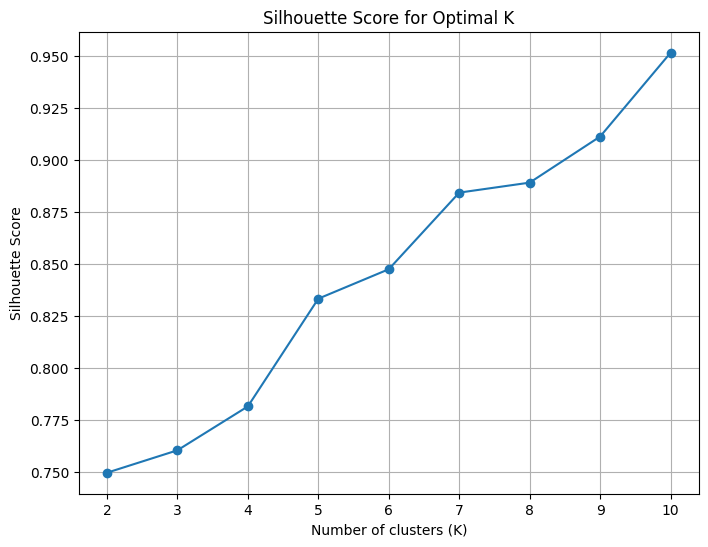

Optimal number of clusters (K) is: 10


In [52]:
# Step 3: Determine the optimal K using Silhouette Score
silhouette_scores = []
k_values = range(2, 11)  # Define the range of K values to try

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(preprocess_dec_selected_features_df)
    silhouette_avg = silhouette_score(preprocess_dec_selected_features_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

# Step 5: Visualize the Silhouette Scores for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid()
plt.show()

# Step 6: Choose the K value with the highest Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (K) is: {optimal_k}')

# Print the resulting DataFrame with 'idpel' as the primary key
# preprocess_dec_selected_features_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

K=1: SSE=622546971455.0094
K=2: SSE=180640719365.21588
K=3: SSE=94696130260.89307
K=4: SSE=32511805172.16146
K=5: SSE=14061187377.853765
K=6: SSE=7827610720.976004
K=7: SSE=3933842288.0454845
K=8: SSE=2604686599.248925
K=9: SSE=1596686281.7691402
K=10: SSE=536652643.4193413
K=11: SSE=167668176.14636752
K=12: SSE=15942750.775964458
K=13: SSE=7938698.045083954


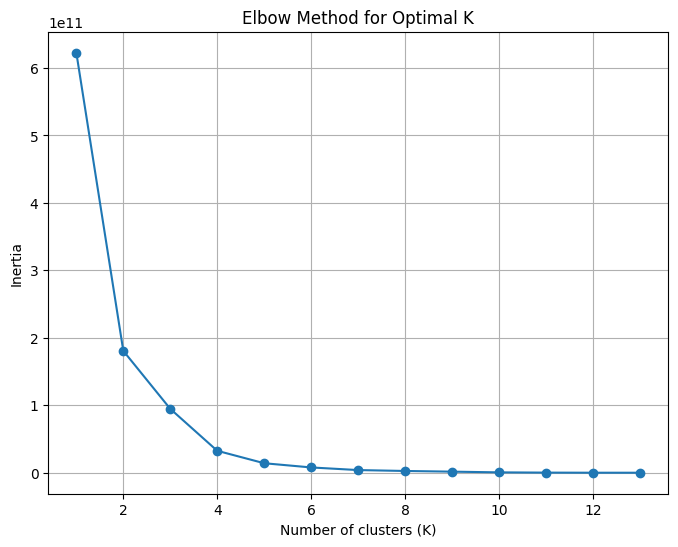

In [53]:
#Without standardscaller

# Determine the optimal K using the Elbow Method
inertias = []
k_values = range(1, 14)  # Define the range of K values to try

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(preprocess_dec_selected_features_df)
    inertias.append(kmeans.inertia_)

# Print the list of SSE values for each cluster
for k, sse in zip(k_values, inertias):
    print(f'K={k}: SSE={sse}')

# Step 5: Visualize the inertia values for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

K=1: SSE=15840.000000000013
K=2: SSE=7438.210814918047
K=3: SSE=7270.5258048607
K=4: SSE=7120.288824079302
K=5: SSE=6815.568954369875
K=6: SSE=6700.174543678201
K=7: SSE=6567.088078997605
K=8: SSE=6397.222231824551
K=9: SSE=6262.931400648467
K=10: SSE=6161.17085215542
K=11: SSE=6000.563796561159
K=12: SSE=5863.302347380133
K=13: SSE=5773.65602809741


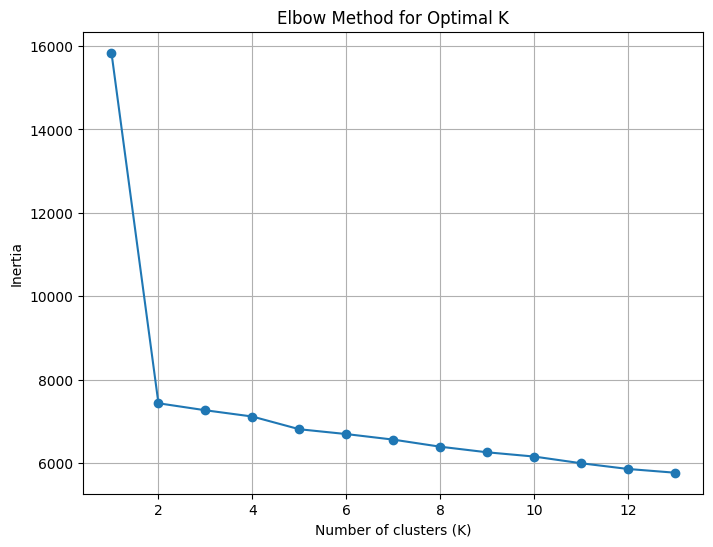

In [54]:
# With standardscaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(preprocess_dec_selected_features_df)

#Determine the optimal K using the Elbow Method
inertias = []
k_values = range(1, 14)  # Define the range of K values to try

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Print the list of SSE values for each cluster
for k, sse in zip(k_values, inertias):
    print(f'K={k}: SSE={sse}')


#Visualize the inertia values for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [60]:
dec_selected_features = preprocess_dec_selected_features_df.copy()
dec_selected_features

,DAYA,KAPASITAS_TRAFO,%PEMBEBANAN,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,197000,200.0,23.474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,197000,160.0,20.221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,197000,315.0,24.757,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,197000,100.0,101.863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,197000,100.0,111.268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,164000,200.0,0.558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
156,197000,315.0,29.667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157,66000,100.0,37.817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158,33000,100.0,14.156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Clustering Data

### K Means

In [61]:
# Convert dec_selected_features to NumPy array
dec_selected_features_np = dec_selected_features.values

# Specify the number of clusters (k)
k = 4

# Inisialisasi centroid secara acak
initial_centroids = dec_selected_features_np[np.random.choice(dec_selected_features_np.shape[0], k, replace=False)]
dec_selected_features_np

array([[197000, 200.0, 23.474, ..., 0, 0, 0],
       [197000, 160.0, 20.221, ..., 0, 0, 0],
       [197000, 315.0, 24.757, ..., 0, 0, 0],
       ...,
       [66000, 100.0, 37.817, ..., 0, 0, 0],
       [33000, 100.0, 14.156, ..., 0, 0, 0],
       [33000, 100.0, 13.525, ..., 0, 0, 0]], dtype=object)

In [57]:
n, d = dec_selected_features.shape
print(n)
print(d)

160
99


#### Sckit Learn

In [ ]:
# class KMEANS_Scratch:
#   def __init__(self, X, num_clusters):
#     self.K = num_clusters
#     self.plot_figure = True
#     self.max_iterations = 100
#     self.num_examples, self.num_features = X.shape
#   def initialize_random_centroids(self,X):
#     centroids = np.zeros((self.K, self.num_features))
#     for k in range(self.K):
#       centroid = X[np.random.choice(range(self.num_examples))]
#       centroids[k] = centroid
#     return centroids
#   def create_clusters(self, X, centroids):
#     clusters = [[] for _ in range(self.K)]
#     for point_idx, point in enumerate(X):
#       closest_centroid = np.argmin(np.sqrt(np.sum((point-centroids)**2, axis=1)))
#       clusters[closest_centroid].append(point_idx)
#     return clusters

#   def calculate_new_centroids(self, clusters, X):
#     centroids = np.zeros((self.K, self.num_features))
#     for idx, cluster in enumerate(clusters):
#       new_centroid = np.mean(X[cluster], axis=0)
#       centroids[idx] = new_centroid
#     return centroids

#   def predict_cluster(self, clusters, X):
#     y_pred = np.zeros(self.num_examples)
#     for cluster_idx, cluster in enumerate(clusters):
#       for sample_idx in cluster:
#         y_pred[sample_idx] = cluster_idx
#     return y_pred

#   def fit(self, X):
#     centroids = self.initialize_random_centroids(X)
#     for it in range(self.max_iterations):
#       clusters = self.create_clusters(X, centroids)
#       prev_centroids = centroids
#       centroids = self.calculate_new_centroids(clusters, X)
#       for idx, cluster in enumerate(clusters):
#         diff = centroids - prev_centroids
#         if not diff.any():
#           break
#       y_pred = self.predict_cluster(clusters, X)
#     return y_pred

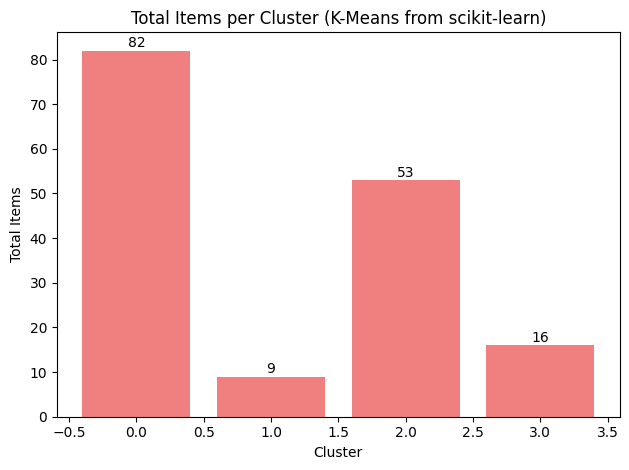

In [58]:
# Perform K-Means clustering using scikit-learn with the same initial centroids
kmeans_sklearn = KMeans(n_clusters=k, init=initial_centroids, n_init=1)
labels_sklearn = kmeans_sklearn.fit_predict(dec_selected_features_np)

# Visualize the total items for each cluster in a bar chart (scikit-learn)
total_items_sklearn = [np.sum(labels_sklearn == i) for i in range(k)]

bars_sklearn = plt.bar(range(k), total_items_sklearn, color='lightcoral')
plt.xlabel('Cluster')
plt.ylabel('Total Items')
plt.title('Total Items per Cluster (K-Means from scikit-learn)')

# Add annotations on top of the bars
for bar, total in zip(bars_sklearn, total_items_sklearn):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(total, 2), ha='center', va='bottom')


plt.tight_layout()
plt.show()


#### Scracth

In [62]:
# Function to calculate distances between points and centroids
def calculate_distances(data, centroids):
    return np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

# Function to perform K-Means clustering from scratch
def k_means_scratch(data, k, initial_centroids, max_iters=100):
    # n, d = data.shape

    # Initialize centroids with the same initial centroids
    centroids = initial_centroids

    for _ in range(max_iters):
        # Calculate distances from each point to centroids
        distances = calculate_distances(data, centroids)
        # print(distances)

        # Assign points to the cluster with the smallest distance
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Perform K-Means clustering from scratch with the same initial centroids
labels_scratch, centroids_scratch = k_means_scratch(dec_selected_features_np, k, initial_centroids)

# Visualize the total items for each cluster in a bar chart (from scratch)
total_items_scratch = [np.sum(labels_scratch == i) for i in range(k)]

plt.figure(figsize=(12, 6))
bars_scratch = plt.bar(range(k), total_items_scratch, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Items')
plt.title('Total Items per Cluster (K-Means from Scratch)')

# Add annotations on top of the bars
for bar, total in zip(bars_sklearn, total_items_sklearn):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(total, 2), ha='center', va='bottom')


plt.tight_layout()
plt.show()

TypeError: ignored

In [ ]:
preprocess_dec_cal_df[preprocess_dec_cal_df['Cluster_Labels'] == 0]

,IDPEL,MAX_CURRENT,DAYA,KAPASITAS_TRAFO,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,NOM_CURRENT,%PEMBEBANAN,Cluster_Labels
0,321103330137,67.763,197000.0,200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,288.675135,23.474,0
1,321110000318,46.699,197000.0,160.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,230.940108,20.221,0
2,321110038865,112.560,197000.0,315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,454.663337,24.757,0
3,321110073176,147.027,197000.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,144.337567,101.863,0
4,321110104399,160.601,197000.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.337567,111.268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,321610058295,142.102,197000.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.084392,393.805,0
148,321611277117,18.592,197000.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144.337567,12.881,0
150,321621039106,18.341,197000.0,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.168784,25.414,0
151,321621040055,3.559,197000.0,160.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,230.940108,1.541,0


### K Harmmonic Means

<ipython-input-312-9f5709a010d6>:17: RuntimeWarning: divide by zero encountered in power
  np.power(np.mean(np.power(data[labels == i], -self.k), axis=0), -1/self.k)


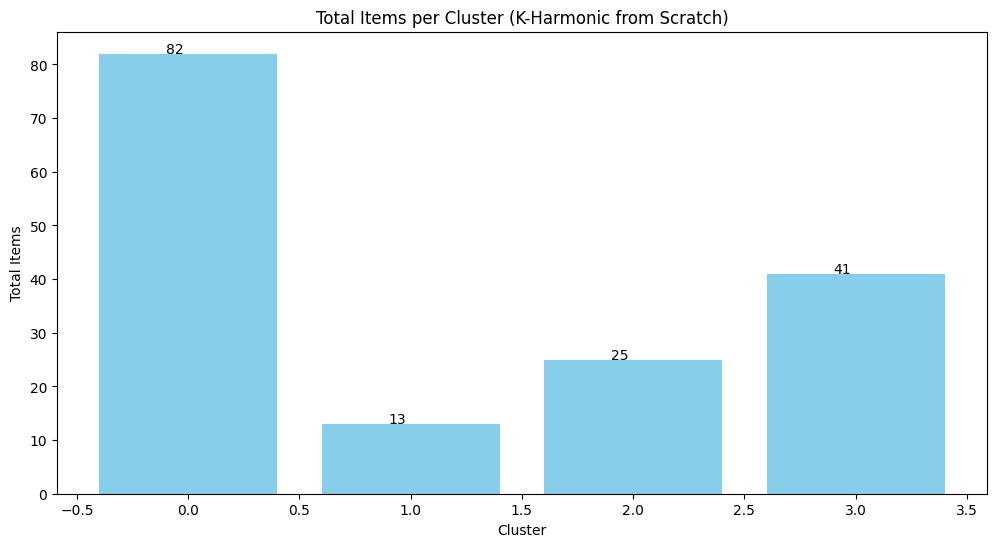

In [ ]:
class KHarmonicMeans:
    def __init__(self, k, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, data):
        n, m = data.shape
        centroids = initial_centroids

        for iter in range(self.max_iters):
            # Assign each point to the cluster with the nearest centroid
            labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

            # Update centroids using k-harmonic mean
            new_centroids = np.array([
                np.power(np.mean(np.power(data[labels == i], -self.k), axis=0), -1/self.k)
                for i in range(self.k)
            ])

            # Check for convergence
            if np.linalg.norm(new_centroids - centroids) < self.tol:
                break

            centroids = new_centroids

        return labels, centroids

# Example usage:
k = 4  # Number of clusters

kharmonic_means = KHarmonicMeans(k)
labels, centroids = kharmonic_means.fit(dec_selected_features_np)

# Count the number of items in each cluster
cluster_counts = np.bincount(labels)

# Visualize the total items for each cluster in a bar chart (from scratch)
total_items_scratch = [np.sum(labels == i) for i in range(k)]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(k), total_items_scratch, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Items')
plt.title('Total Items per Cluster (K-Harmonic from Scratch)')

# Display total items number on top of each bar
for bar, count in zip(bars, total_items_scratch):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(count), fontsize=10)

# Visualization


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


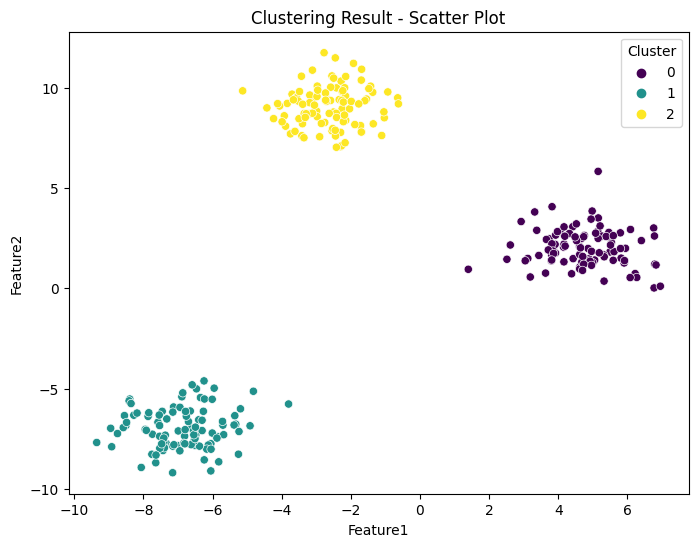

Average Silhouette Score: 0.8480303059596955


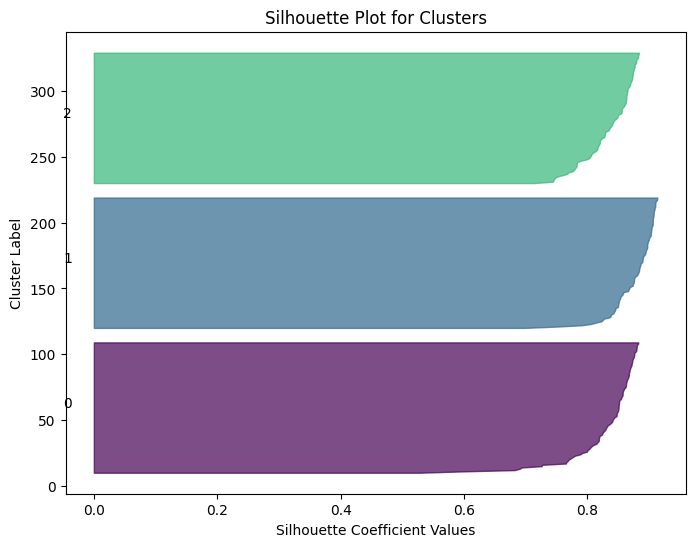

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate sample data (replace this with your actual data)
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Perform clustering (replace this with your clustering algorithm)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels to the original dataset
X_labeled = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
X_labeled['Cluster'] = labels

# Visualize clustering using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=X_labeled, palette='viridis')
plt.title('Clustering Result - Scatter Plot')
plt.show()

# Visualize silhouette scores
silhouette_avg = silhouette_score(X, labels)
print(f"Average Silhouette Score: {silhouette_avg}")

# Visualize silhouette plot for each data point
silhouette_values = silhouette_samples(X, labels)

plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / n_clusters)
    plt.fill_betweenx(y=np.arange(y_lower, y_upper),
                      x1=0, x2=cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.show()



In [ ]:
# Separate the labels and the data
X = data.drop(columns='LABEL').values
labels = data['LABEL'].values

# Apply PCA and reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=100)

# Display a legend for the clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Cluster Visualization')
plt.show()

# Not Used

In [ ]:
# detect outliers for CURRENT_L1 feature
def detect_outliers_l1(group):
    arus_l1_q1 = group['CURRENT_L1'].quantile(0.25)
    arus_l1_q3 = group['CURRENT_L1'].quantile(0.75)
    arus_l1_qr = arus_l1_q3 - arus_l1_q1
    lower_bound_l1 = arus_l1_q1 - (1.5 * arus_l1_qr)
    upper_bound_l1 = arus_l1_q3 + (1.5 * arus_l1_qr)
    return (group['CURRENT_L1'] < lower_bound_l1) & (group['CURRENT_L1'] == 0.0) | (group['CURRENT_L1'] > upper_bound_l1) & (group['CURRENT_L1'] > 5)
outliers_l1 = preprocess_dec_df_l1.groupby('IDPEL').apply(detect_outliers_l1)
outliers_l1 = outliers_l1.reset_index(level=0, drop=True)
outliers_table_l1 = preprocess_dec_df_l1[outliers_l1]
outliers_table_l1[['IDPEL', 'READ_DATE', 'CURRENT_L1', 'NOMOR_GARDU', 'KAPASITAS_TRAFO', 'DAYA']]

In [ ]:
# detect outliers for CURRENT_L1 feature
def detect_outliers_l1(group):
    arus_l1_q1 = group['CURRENT_L1'].quantile(0.25)
    arus_l1_q3 = group['CURRENT_L1'].quantile(0.75)
    arus_l1_qr = arus_l1_q3 - arus_l1_q1
    lower_bound_l1 = arus_l1_q1 - (1.5 * arus_l1_qr)
    upper_bound_l1 = arus_l1_q3 + (1.5 * arus_l1_qr)
    return (group['CURRENT_L1'] < lower_bound_l1) & (group['CURRENT_L1'] == 0.0) | (group['CURRENT_L1'] > upper_bound_l1) & (group['CURRENT_L1'] > 5)
outliers_l1 = preprocess_dec_df_l2.groupby('IDPEL').apply(detect_outliers_l1)
outliers_l1 = outliers_l1.reset_index(level=0, drop=True)
outliers_table_l1 = preprocess_dec_df_l2[outliers_l1]
outliers_table_l1[['IDPEL', 'READ_DATE', 'CURRENT_L1', 'NOMOR_GARDU', 'KAPASITAS_TRAFO', 'DAYA']]

,IDPEL,READ_DATE,CURRENT_L1,NOMOR_GARDU,KAPASITAS_TRAFO,DAYA
4940,321110000318,2022-12-28 08:45:00,0.0,GD321110676,160.0,197000
4941,321110000318,2022-12-28 09:00:00,0.0,GD321110676,160.0,197000
4942,321110000318,2022-12-28 09:15:00,0.0,GD321110676,160.0,197000
4943,321110000318,2022-12-28 09:30:00,0.0,GD321110676,160.0,197000
4944,321110000318,2022-12-28 09:45:00,0.0,GD321110676,160.0,197000
...,...,...,...,...,...,...
459956,321731003713,2022-12-31 14:15:00,0.0,GD321610195,100.0,33000
459957,321731003713,2022-12-31 14:30:00,0.0,GD321610195,100.0,33000
459958,321731003713,2022-12-31 14:45:00,0.0,GD321610195,100.0,33000
459959,321731003713,2022-12-31 15:00:00,0.0,GD321610195,100.0,33000


In [ ]:
# detect outliers for CURRENT_l2 feature
def detect_outliers_l2(group):
    arus_l2_q1 = group['CURRENT_L2'].quantile(0.25)
    arus_l2_q3 = group['CURRENT_L2'].quantile(0.75)
    arus_l2_qr = arus_l2_q3 - arus_l2_q1
    lower_bound_l2 = arus_l2_q1 - (1.5 * arus_l2_qr)
    upper_bound_l2 = arus_l2_q3 + (1.5 * arus_l2_qr)
    return (group['CURRENT_L2'] < lower_bound_l2) & (group['CURRENT_L2'] == 0.0) | (group['CURRENT_L2'] > upper_bound_l2) & (group['CURRENT_L2'] > 5)
outliers_l2 = preprocess_dec_df_l2.groupby('IDPEL').apply(detect_outliers_l2)
outliers_l2 = outliers_l2.reset_index(level=0, drop=True)
outliers_table_l2 = preprocess_dec_df_l2[outliers_l2]
outliers_table_l2[['IDPEL', 'READ_DATE', 'CURRENT_L2', 'NOMOR_GARDU', 'KAPASITAS_TRAFO', 'DAYA']]

,IDPEL,READ_DATE,CURRENT_L2,NOMOR_GARDU,KAPASITAS_TRAFO,DAYA
17033,321110140121,2022-12-30 14:30:00,0.0,GD321110905,200.0,66000
17034,321110140121,2022-12-30 14:45:00,0.0,GD321110905,200.0,66000
17035,321110140121,2022-12-30 15:00:00,0.0,GD321110905,200.0,66000
17036,321110140121,2022-12-30 15:15:00,0.0,GD321110905,200.0,66000
17037,321110140121,2022-12-30 15:30:00,0.0,GD321110905,200.0,66000
...,...,...,...,...,...,...
459956,321731003713,2022-12-31 14:15:00,0.0,GD321610195,100.0,33000
459957,321731003713,2022-12-31 14:30:00,0.0,GD321610195,100.0,33000
459958,321731003713,2022-12-31 14:45:00,0.0,GD321610195,100.0,33000
459959,321731003713,2022-12-31 15:00:00,0.0,GD321610195,100.0,33000


In [ ]:
# detect outliers for CURRENT_l3 feature
def detect_outliers_l3(group):
    arus_l3_q1 = group['CURRENT_L3'].quantile(0.35)
    arus_l3_q3 = group['CURRENT_L3'].quantile(0.75)
    arus_l3_qr = arus_l3_q3 - arus_l3_q1
    lower_bound_l3 = arus_l3_q1 - (1.5 * arus_l3_qr)
    upper_bound_l3 = arus_l3_q3 + (1.5 * arus_l3_qr)
    return (group['CURRENT_L3'] < lower_bound_l3) & (group['CURRENT_L3'] == 0.0) | (group['CURRENT_L3'] > upper_bound_l3) & (group['CURRENT_L3'] > 5)
outliers_l3 = preprocess_dec_df_l3.groupby('IDPEL').apply(detect_outliers_l3)
outliers_l3 = outliers_l3.reset_index(level=0, drop=True)
outliers_table_l3 = preprocess_dec_df_l3[outliers_l3]
outliers_table_l3[['IDPEL', 'READ_DATE', 'CURRENT_L3', 'NOMOR_GARDU', 'KAPASITAS_TRAFO', 'DAYA']]

,IDPEL,READ_DATE,CURRENT_L3,NOMOR_GARDU,KAPASITAS_TRAFO,DAYA
17033,321110140121,2022-12-30 14:30:00,0.0,GD321110905,200.0,66000
17034,321110140121,2022-12-30 14:45:00,0.0,GD321110905,200.0,66000
17035,321110140121,2022-12-30 15:00:00,0.0,GD321110905,200.0,66000
17036,321110140121,2022-12-30 15:15:00,0.0,GD321110905,200.0,66000
17037,321110140121,2022-12-30 15:30:00,0.0,GD321110905,200.0,66000
...,...,...,...,...,...,...
459956,321731003713,2022-12-31 14:15:00,0.0,GD321610195,100.0,33000
459957,321731003713,2022-12-31 14:30:00,0.0,GD321610195,100.0,33000
459958,321731003713,2022-12-31 14:45:00,0.0,GD321610195,100.0,33000
459959,321731003713,2022-12-31 15:00:00,0.0,GD321610195,100.0,33000


In [ ]:
# Ganti outliers dengan Q1 dan Q3
def replace_outliers_with_q1_q3(group, arus_q1, arus_q3, lower_bound,upper_bound, column):
    group['CURRENT_L3'] = group['CURRENT_L3'].apply(lambda x: arus_q1 if x < lower_bound else (arus_q3 if x > upper_bound else x))

    return group

# Terapkan fungsi penggantian pada outliers_table_l3
outliers_table_l3 = outliers_table_l3.groupby('IDPEL').apply(replace_outliers_with_q1_q3, arus_l1_q1, arus_l1_q3, lower_bound,upper_bound, 'CURRENT_L1')


In [ ]:
# Show selected column
preprocess_dec_df = preprocess_dec_df[['LOCATION_CODE', 'READ_DATE', 'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3']]

# Create a dictionary to map old column names to new column names
column_rename_mapping = {
    'LOCATION_CODE': 'IDPEL',
}

# Rename the columns
preprocess_dec_df = preprocess_dec_df.rename(columns=column_rename_mapping)

# change IDPEL data type
preprocess_dec_df['IDPEL'] = preprocess_dec_df['IDPEL'].astype(str)
preprocess_faktor_kali_df['IDPEL'] = preprocess_faktor_kali_df['IDPEL'].astype(str)
preprocess_dil_df['IDPEL'] = preprocess_dil_df['IDPEL'].astype(str)

preprocess_dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465371 entries, 0 to 465370
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDPEL       465371 non-null  object 
 1   READ_DATE   465371 non-null  object 
 2   CURRENT_L1  465371 non-null  float64
 3   CURRENT_L2  465371 non-null  float64
 4   CURRENT_L3  465371 non-null  float64
dtypes: float64(3), object(2)
memory usage: 17.8+ MB


In [ ]:
preprocess_faktor_kali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IDPEL        168 non-null    object
 1   Faktor Kali  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [ ]:
# # Create a dictionary to map old column names to new column names
# column_rename_mapping = {
#     'NOMOR_METER_KWH': 'METER_CODE',
# }

# # Rename the columns
# preprocess_dil_df = preprocess_dil_df.rename(columns=column_rename_mapping)

In [ ]:
# # change IDPEL data type
# preprocess_dil_df['IDPEL'] = preprocess_dil_df['IDPEL'].astype(str)

# # Filter data in data_dil based on a column in data_april
# preprocess_dil_df = preprocess_dil_df[preprocess_dil_df['IDPEL'].isin(preprocess_dec_df['IDPEL'])]

# # Save the modified data_dil to a new Excel file
# preprocess_dil_df.to_csv(ROOT_PATH + 'selected_gardu_dec.csv', index=False)
# preprocess_dil_df.info()

In [ ]:
# Convert the date column to a READ_DATE object
preprocess_dec_df['READ_DATE'] = pd.to_datetime(preprocess_dec_df['READ_DATE'])

# Extract the day from the READ_DATE column
preprocess_dec_df['DAY'] = preprocess_dec_df['READ_DATE'].dt.day_name()

# Extract the hour from the READ_DATE column
preprocess_dec_df['HOUR'] = preprocess_dec_df['READ_DATE'].dt.strftime('%H')

preprocess_dec_df

,IDPEL,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,DAY,HOUR
0,321103330137,2022-12-01 00:00:00,1.213087,0.951574,1.079308,Thursday,00
1,321103330137,2022-12-01 00:15:00,1.176808,0.951574,1.179831,Thursday,00
2,321103330137,2022-12-01 00:30:00,1.185878,0.961400,1.175296,Thursday,00
3,321103330137,2022-12-01 00:45:00,1.080819,0.922098,1.203262,Thursday,00
4,321103330137,2022-12-01 01:00:00,1.239541,0.956109,1.220646,Thursday,01
...,...,...,...,...,...,...,...
465366,326501066388,2022-12-31 22:45:00,0.000000,0.006000,0.000000,Saturday,22
465367,326501066388,2022-12-31 23:00:00,0.000000,0.006000,0.000000,Saturday,23
465368,326501066388,2022-12-31 23:15:00,0.000000,0.006000,0.000000,Saturday,23
465369,326501066388,2022-12-31 23:30:00,0.000000,0.006000,0.000000,Saturday,23


In [ ]:
# Remove Saturday & Sunday in preprocess_dec_df
preprocess_dec_df.drop(preprocess_dec_df[preprocess_dec_df["DAY"].str.contains(r"(Sunday)|(Saturday)")==True].index,
             inplace=True)

# will remove the other holidays

preprocess_dec_df

<ipython-input-8-09067ea70fdd>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  preprocess_dec_df.drop(preprocess_dec_df[preprocess_dec_df["DAY"].str.contains(r"(Sunday)|(Saturday)")==True].index,


,IDPEL,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,DAY,HOUR
0,321103330137,2022-12-01 00:00:00,1.213087,0.951574,1.079308,Thursday,00
1,321103330137,2022-12-01 00:15:00,1.176808,0.951574,1.179831,Thursday,00
2,321103330137,2022-12-01 00:30:00,1.185878,0.961400,1.175296,Thursday,00
3,321103330137,2022-12-01 00:45:00,1.080819,0.922098,1.203262,Thursday,00
4,321103330137,2022-12-01 01:00:00,1.239541,0.956109,1.220646,Thursday,01
...,...,...,...,...,...,...,...
465270,326501066388,2022-12-30 22:45:00,0.000000,0.004000,0.000000,Friday,22
465271,326501066388,2022-12-30 23:00:00,0.000000,0.004000,0.000000,Friday,23
465272,326501066388,2022-12-30 23:15:00,0.000000,0.004000,0.000000,Friday,23
465273,326501066388,2022-12-30 23:30:00,0.000000,0.004000,0.000000,Friday,23


In [ ]:
preprocess_dec_df = pd.merge(preprocess_dec_df, preprocess_faktor_kali_df, on='IDPEL')

preprocess_dec_df.to_csv(ROOT_PATH+'preprocess_dec_df.csv');

In [ ]:
preprocess_dec_df

,IDPEL,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,DAY,HOUR,Faktor Kali
0,321103330137,2022-12-01 00:00:00,1.213087,0.951574,1.079308,Thursday,00,60
1,321103330137,2022-12-01 00:15:00,1.176808,0.951574,1.179831,Thursday,00,60
2,321103330137,2022-12-01 00:30:00,1.185878,0.961400,1.175296,Thursday,00,60
3,321103330137,2022-12-01 00:45:00,1.080819,0.922098,1.203262,Thursday,00,60
4,321103330137,2022-12-01 01:00:00,1.239541,0.956109,1.220646,Thursday,01,60
...,...,...,...,...,...,...,...,...
330436,326501066388,2022-12-30 22:45:00,0.000000,0.004000,0.000000,Friday,22,1
330437,326501066388,2022-12-30 23:00:00,0.000000,0.004000,0.000000,Friday,23,1
330438,326501066388,2022-12-30 23:15:00,0.000000,0.004000,0.000000,Friday,23,1
330439,326501066388,2022-12-30 23:30:00,0.000000,0.004000,0.000000,Friday,23,1


In [ ]:
preprocess_dec_df['ARUS_L1']=preprocess_dec_df['CURRENT_L1']*preprocess_dec_df['Faktor Kali']
preprocess_dec_df['ARUS_L2']=preprocess_dec_df['CURRENT_L2']*preprocess_dec_df['Faktor Kali']
preprocess_dec_df['ARUS_L3']=preprocess_dec_df['CURRENT_L3']*preprocess_dec_df['Faktor Kali']
preprocess_dec_df

,IDPEL,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,DAY,HOUR,Faktor Kali,ARUS_L1,ARUS_L2,ARUS_L3
0,321103330137,2022-12-01 00:00:00,1.213087,0.951574,1.079308,Thursday,00,60,72.785244,57.094466,64.758462
1,321103330137,2022-12-01 00:15:00,1.176808,0.951574,1.179831,Thursday,00,60,70.608486,57.094466,70.789884
2,321103330137,2022-12-01 00:30:00,1.185878,0.961400,1.175296,Thursday,00,60,71.152674,57.684006,70.517790
3,321103330137,2022-12-01 00:45:00,1.080819,0.922098,1.203262,Thursday,00,60,64.849152,55.325854,72.195702
4,321103330137,2022-12-01 01:00:00,1.239541,0.956109,1.220646,Thursday,01,60,74.372460,57.366564,73.238730
...,...,...,...,...,...,...,...,...,...,...,...
330436,326501066388,2022-12-30 22:45:00,0.000000,0.004000,0.000000,Friday,22,1,0.000000,0.004000,0.000000
330437,326501066388,2022-12-30 23:00:00,0.000000,0.004000,0.000000,Friday,23,1,0.000000,0.004000,0.000000
330438,326501066388,2022-12-30 23:15:00,0.000000,0.004000,0.000000,Friday,23,1,0.000000,0.004000,0.000000
330439,326501066388,2022-12-30 23:30:00,0.000000,0.004000,0.000000,Friday,23,1,0.000000,0.004000,0.000000


In [ ]:
# arus_l1_q1 = preprocess_dec_df['ARUS_L1'].quantile(0.25)
# arus_l1_q3 = preprocess_dec_df['ARUS_L1'].quantile(0.75)
# arus_l1_qr = arus_l1_q3 - arus_l1_q1
# lower_bound = arus_l1_q1 - (1.5 * arus_l1_qr)
# upper_bound = arus_l1_q3 + (1.5 * arus_l1_qr)

# outliers = preprocess_dec_df[(preprocess_dec_df['ARUS_L1'] < lower_bound) | (preprocess_dec_df['ARUS_L1'] > upper_bound)]
# outliers

,IDPEL,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,DAY,HOUR,Faktor Kali,ARUS_L1,ARUS_L2,ARUS_L3
6336,321110073176,2022-12-07 19:30:00,2.881177,2.520652,2.212278,Wednesday,19,60,172.870620,151.239120,132.736704
6337,321110073176,2022-12-07 19:45:00,2.927282,2.567513,2.238732,Wednesday,19,60,175.636914,154.050768,134.323920
6338,321110073176,2022-12-07 20:00:00,2.866061,2.578850,2.244779,Wednesday,20,60,171.963642,154.731000,134.686716
6339,321110073176,2022-12-07 20:15:00,2.946933,2.587164,2.223616,Wednesday,20,60,176.815998,155.229840,133.416936
6340,321110073176,2022-12-07 20:30:00,3.080713,2.583385,2.184313,Wednesday,20,60,184.842768,155.003088,131.058780
...,...,...,...,...,...,...,...,...,...,...,...
319700,321631464995,2022-12-22 08:15:00,2.835072,2.991526,2.918968,Thursday,08,60,170.104320,179.491584,175.138080
319717,321631464995,2022-12-22 12:30:00,2.935596,3.091294,2.972631,Thursday,12,60,176.135760,185.477658,178.357860
319718,321631464995,2022-12-22 12:45:00,2.903096,3.057282,2.948445,Thursday,12,60,174.185742,183.436944,176.906688
319719,321631464995,2022-12-22 13:00:00,2.899316,3.058794,2.939375,Thursday,13,60,173.958990,183.527658,176.362500


In [ ]:
# # ratio outliers every gardu
# def detect_outliers(group):
#     arus_l1_q1 = group['ARUS_L1'].quantile(0.25)
#     arus_l1_q3 = group['ARUS_L1'].quantile(0.75)
#     arus_l1_qr = arus_l1_q3 - arus_l1_q1
#     lower_bound = arus_l1_q1 - (1.5 * arus_l1_qr)
#     upper_bound = arus_l1_q3 + (1.5 * arus_l1_qr)
#     outliers = group[(group['ARUS_L1'] < lower_bound) | (group['ARUS_L1'] > upper_bound)]
#     return len(outliers) / len(group) * 100
# percentage_outliers = preprocess_dec_df.groupby('IDPEL').apply(detect_outliers)
# percentage_outliers

IDPEL
321103330137     0.725514
321110000318     0.520833
321110038865     0.047348
321110073176     0.000000
321110104399     0.000000
                  ...    
321700000451     2.964043
321700002151     3.952381
321731003713     2.756654
326501015818    15.451389
326501066388    11.221591
Length: 163, dtype: float64

In [ ]:
# ratio outliers every gardu
# def detect_outlierss(group):
#     arus_l1_q1 = group['ARUS_L1'].quantile(0.25)
#     arus_l1_q3 = group['ARUS_L1'].quantile(0.75)
#     arus_l1_qr = arus_l1_q3 - arus_l1_q1
#     lower_bound = arus_l1_q1 - (1.5 * arus_l1_qr)
#     upper_bound = arus_l1_q3 + (1.5 * arus_l1_qr)
#     return (group['ARUS_L1'] < lower_bound) | (group['ARUS_L1'] > upper_bound)
# outliers = preprocess_dec_df.groupby('IDPEL').apply(detect_outlierss)
# outliers = outliers.reset_index(level=0, drop=True)
# outliers_table = preprocess_dec_df[outliers]
# outliers_table = pd.merge(outliers_table, preprocess_dil_df, on='IDPEL', how='left')
# outliers_table[['IDPEL', 'READ_DATE', 'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3', 'NOMOR_GARDU', 'KAPASITAS_TRAFO']]
# outliers_table['Is_Outlier'] = True

# # Display the table
# print(outliers_table)
# # Function to detect outliers
# def detect_outliers(group):
#     Q1 = group['ARUS'].quantile(0.25)
#     Q3 = group['ARUS'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return (group['ARUS'] < lower_bound) | (group['ARUS'] > upper_bound)

# # Identify outliers and create a table
# outliers = df.groupby('gardu').apply(detect_outliers)
# outliers_table = df[outliers].copy()
# outliers_table['Is_Outlier'] = True

# # Display the table
# print(outliers_table)

,IDPEL,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,NOMOR_GARDU,KAPASITAS_TRAFO
0,321103330137,2022-12-01 08:45:00,1.849486,1.597043,1.680183,GD321110816,200.0
1,321103330137,2022-12-01 09:00:00,1.790532,1.455705,1.538089,GD321110816,200.0
2,321103330137,2022-12-01 09:15:00,1.815474,1.447391,1.589485,GD321110816,200.0
3,321103330137,2022-12-01 09:30:00,1.720997,1.479891,1.518438,GD321110816,200.0
4,321103330137,2022-12-01 10:45:00,1.824544,1.545647,1.702857,GD321110816,200.0
...,...,...,...,...,...,...,...
13334,326501066388,2022-12-30 13:45:00,1.953000,1.807000,1.463000,NaN,NaN
13335,326501066388,2022-12-30 14:00:00,1.647000,1.498000,1.197000,NaN,NaN
13336,326501066388,2022-12-30 14:15:00,2.391000,2.208000,1.887000,NaN,NaN
13337,326501066388,2022-12-30 14:30:00,1.841000,1.704000,1.349000,NaN,NaN


In [ ]:
preprocess_dec_df_l1 = preprocess_dec_df.copy()
preprocess_dec_df_l2 = preprocess_dec_df.copy()
preprocess_dec_df_l3 = preprocess_dec_df.copy()

In [ ]:
# detect outliers every feature
def detect_outliers_l1(group):
    arus_l1_q1 = group['ARUS_L1'].quantile(0.25)
    arus_l1_q3 = group['ARUS_L1'].quantile(0.75)
    arus_l1_qr = arus_l1_q3 - arus_l1_q1
    lower_bound = arus_l1_q1 - (1.5 * arus_l1_qr)
    upper_bound = arus_l1_q3 + (1.5 * arus_l1_qr)
    return (group['ARUS_L1'] < lower_bound) | (group['ARUS_L1'] > upper_bound)
outliers_l1 = preprocess_dec_df_l1.groupby('IDPEL').apply(detect_outliers_l1)
outliers_l1 = outliers_l1.reset_index(level=0, drop=True)
outliers_table_l1 = preprocess_dec_df_l1[outliers_l1]
outliers_table_l1 = pd.merge(outliers_table_l1, preprocess_dil_df, on='IDPEL', how='left')
outliers_table_l1[['IDPEL', 'READ_DATE', 'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3', 'NOMOR_GARDU', 'KAPASITAS_TRAFO', 'DAYA']]

,IDPEL,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,NOMOR_GARDU,KAPASITAS_TRAFO,DAYA
0,321103330137,2022-12-01 08:45:00,1.849486,1.597043,1.680183,GD321110816,200.0,197000.0
1,321103330137,2022-12-01 09:00:00,1.790532,1.455705,1.538089,GD321110816,200.0,197000.0
2,321103330137,2022-12-01 09:15:00,1.815474,1.447391,1.589485,GD321110816,200.0,197000.0
3,321103330137,2022-12-01 09:30:00,1.720997,1.479891,1.518438,GD321110816,200.0,197000.0
4,321103330137,2022-12-01 10:45:00,1.824544,1.545647,1.702857,GD321110816,200.0,197000.0
...,...,...,...,...,...,...,...,...
13334,326501066388,2022-12-30 13:45:00,1.953000,1.807000,1.463000,NaN,NaN,NaN
13335,326501066388,2022-12-30 14:00:00,1.647000,1.498000,1.197000,NaN,NaN,NaN
13336,326501066388,2022-12-30 14:15:00,2.391000,2.208000,1.887000,NaN,NaN,NaN
13337,326501066388,2022-12-30 14:30:00,1.841000,1.704000,1.349000,NaN,NaN,NaN


In [ ]:
# ratio outliers every gardu
def detect_outlierss_l2(group):
    arus_l2_q1 = group['ARUS_L2'].quantile(0.25)
    arus_l2_q3 = group['ARUS_L2'].quantile(0.75)
    arus_l2_qr = arus_l2_q3 - arus_l2_q1
    lower_bound_l2 = arus_l2_q1 - (1.5 * arus_l2_qr)
    upper_bound_l2 = arus_l2_q3 + (1.5 * arus_l2_qr)
    return (group['ARUS_L2'] < lower_bound_l2) | (group['ARUS_L2'] > upper_bound_l2)
outliers_l2 = preprocess_dec_df_l2.groupby('IDPEL').apply(detect_outlierss_l2)
outliers_l2 = outliers_l2.reset_index(level=0, drop=True)
outliers_table_l2 = preprocess_dec_df_l2[outliers_l2]
outliers_table_l2 = pd.merge(outliers_table_l2, preprocess_dil_df, on='IDPEL', how='left')
outliers_table_l2[['IDPEL', 'READ_DATE', 'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3', 'NOMOR_GARDU', 'KAPASITAS_TRAFO']]

,IDPEL,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,NOMOR_GARDU,KAPASITAS_TRAFO
0,321103330137,2022-12-01 08:45:00,1.849486,1.597043,1.680183,GD321110816,200.0
1,321103330137,2022-12-01 09:00:00,1.790532,1.455705,1.538089,GD321110816,200.0
2,321103330137,2022-12-01 09:15:00,1.815474,1.447391,1.589485,GD321110816,200.0
3,321103330137,2022-12-01 09:30:00,1.720997,1.479891,1.518438,GD321110816,200.0
4,321103330137,2022-12-01 09:45:00,1.671113,1.470821,1.601578,GD321110816,200.0
...,...,...,...,...,...,...,...
14738,326501066388,2022-12-30 14:30:00,1.841000,1.704000,1.349000,NaN,NaN
14739,326501066388,2022-12-30 14:45:00,0.126000,0.110000,0.102000,NaN,NaN
14740,326501066388,2022-12-30 16:00:00,0.000000,0.023000,0.000000,NaN,NaN
14741,326501066388,2022-12-30 16:15:00,0.000000,0.063000,0.000000,NaN,NaN


In [ ]:
print(preprocess_dec_df.READ_DATE.min())
print(preprocess_dec_df.READ_DATE.max())

2022-12-01 00:00:00
2022-12-30 23:45:00


In [ ]:
preprocess_dec_df.describe(include='all')

<ipython-input-21-6cae4183829a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  preprocess_dec_df.describe(include='all')


,IDPEL,READ_DATE,CURRENT_L1,CURRENT_L2,CURRENT_L3,DAY,HOUR,Faktor Kali,ARUS_L1,ARUS_L2,ARUS_L3
count,330441,330441,330441.000000,330441.000000,330441.000000,330441,330441,330441.000000,330441.000000,330441.000000,330441.000000
unique,163,2114,NaN,NaN,NaN,5,24,NaN,NaN,NaN,NaN
top,326501066388,2022-12-08 02:00:00,NaN,NaN,NaN,Thursday,00,NaN,NaN,NaN,NaN
freq,2112,163,NaN,NaN,NaN,75750,13891,NaN,NaN,NaN,NaN
first,NaN,2022-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-12-30 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.014712,1.788700,1.597061,NaN,NaN,50.737269,48.857066,46.674576,46.206066
std,NaN,NaN,5.150788,4.296688,3.542152,NaN,NaN,62.770592,54.928675,53.752900,53.554710
min,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.173838,0.144361,0.164012,NaN,NaN,40.000000,6.288403,5.160000,5.940727


In [ ]:
# Group the data by 'METER_CODE' and 'HOUR' and calculate the averages
# preprocess_dec_avg_df = preprocess_dec_df.groupby(['IDPEL', 'HOUR', 'Faktor Kali']).agg({
#     'ARUS_L1' : 'mean',
#     'ARUS_L2' : 'mean',
#     'ARUS_L3' : 'mean'
# })
# preprocess_dec_avg_df.reset_index(inplace=True)

preprocess_dec_avg_df = preprocess_dec_df.groupby(['IDPEL', 'HOUR', 'Faktor Kali'])[["ARUS_L1", "ARUS_L2", "ARUS_L3"]].mean().reset_index()

# Save the average data to a new Excel file
# preprocess_dec_avg_df.to_csv(ROOT_PATH + "preprocess_dec_avg_df.csv", index=False)

preprocess_dec_avg_df.head()

,IDPEL,HOUR,Faktor Kali,ARUS_L1,ARUS_L2,ARUS_L3
0,321103330137,00,60,62.186961,50.234907,60.959961
1,321103330137,01,60,60.664676,48.084434,60.232829
2,321103330137,02,60,59.093950,49.184149,59.697401
3,321103330137,03,60,60.023605,50.543075,60.069985
4,321103330137,04,60,64.382862,54.138243,62.638258


In [ ]:
# Merge the data_dil & data_april based on a METER_CODE column
preprocess_data_dec = pd.merge(preprocess_dec_avg_df, preprocess_dil_df, on='IDPEL', how='left')

# remove the missing value base on KAPASITAS_TRAFO
preprocess_data_dec.dropna(subset=['KAPASITAS_TRAFO'], inplace=True)

# Save the merged data_merged to a new Excel file
preprocess_data_dec.to_csv('preprocess_data_dec.csv', index=False)

# Save the modified data_merged back to an Excel file
# preprocess_data_dec.to_excel("merged_file.xlsx", index=False)
# preprocess_data_dec

preprocess_data_dec

,IDPEL,HOUR,Faktor Kali,ARUS_L1,ARUS_L2,ARUS_L3,TARIF,DAYA,NOMOR_GARDU,KAPASITAS_TRAFO
0,321103330137,00,60,62.186961,50.234907,60.959961,B2,197000.0,GD321110816,200.0
1,321103330137,01,60,60.664676,48.084434,60.232829,B2,197000.0,GD321110816,200.0
2,321103330137,02,60,59.093950,49.184149,59.697401,B2,197000.0,GD321110816,200.0
3,321103330137,03,60,60.023605,50.543075,60.069985,B2,197000.0,GD321110816,200.0
4,321103330137,04,60,64.382862,54.138243,62.638258,B2,197000.0,GD321110816,200.0
...,...,...,...,...,...,...,...,...,...,...
3859,321731003713,19,1,2.597050,18.112656,18.556227,S2,33000.0,GD321610195,100.0
3860,321731003713,20,1,2.726054,17.925334,18.245225,S2,33000.0,GD321610195,100.0
3861,321731003713,21,1,2.927505,16.235652,18.053565,S2,33000.0,GD321610195,100.0
3862,321731003713,22,1,2.687104,15.019429,17.753815,S2,33000.0,GD321610195,100.0


In [ ]:
test = preprocess_data_dec[preprocess_data_dec["ARUS_L1"] == 0]
test['IDPEL'].value_counts()

NameError: ignored

In [ ]:
max_beban_df = preprocess_data_dec.groupby('IDPEL').agg({
    'ARUS_L1': 'max',
    'ARUS_L2' : 'max',
    'ARUS_L3' : 'max'
})
max_beban_df.reset_index(inplace=True)
max_beban_df

,IDPEL,ARUS_L1,ARUS_L2,ARUS_L3
0,321103330137,66.653942,56.118924,65.287532
1,321110000318,45.743289,36.401898,36.009731
2,321110038865,110.905767,108.438882,90.545585
3,321110073176,143.421560,127.310275,109.518498
4,321110104399,147.756003,159.967783,153.187067
...,...,...,...,...
156,321631461762,1.573475,0.000000,0.000000
157,321631464995,125.354522,132.668138,133.644224
158,321700000451,28.308612,53.153239,51.972724
159,321700002151,11.705040,18.322954,8.015275


In [ ]:
hour_l1 = pd.merge(max_beban_df, preprocess_data_dec, how='left', on=['IDPEL', 'ARUS_L1'])[['IDPEL', 'ARUS_L1', 'ARUS_L2_y', 'ARUS_L3_y', 'HOUR']]
hour_l2 = pd.merge(max_beban_df, preprocess_data_dec, how='left', on=['IDPEL', 'ARUS_L2'])[['IDPEL', 'ARUS_L1_y','ARUS_L2', 'ARUS_L3_y', 'HOUR']]
hour_l3 = pd.merge(max_beban_df, preprocess_data_dec, how='left', on=['IDPEL', 'ARUS_L3'])[['IDPEL', 'ARUS_L1_y', 'ARUS_L2_y','ARUS_L3', 'HOUR']]

hour_l1
# max_beban_df = pd.concat([max_beban_df, hour_l1, hour_l2, hour_l3], axis=1)
# max_beban_df

,IDPEL,ARUS_L1,ARUS_L2_y,ARUS_L3_y,HOUR
0,321103330137,66.653942,55.660574,64.186737,06
1,321110000318,45.743289,35.893267,35.453175,12
2,321110038865,110.905767,108.007550,90.545585,11
3,321110073176,143.421560,126.684663,108.887734,19
4,321110104399,147.756003,159.740007,151.657567,11
...,...,...,...,...,...
179,321631461762,1.573475,0.000000,0.000000,19
180,321631464995,125.354522,132.668138,133.644224,18
181,321700000451,28.308612,52.671495,51.972724,19
182,321700002151,11.705040,14.947068,6.021720,18


In [ ]:
hour_l1.rename(columns={
    AR
})

NameError: ignored

In [ ]:
max_beban_df = preprocess_data_dec.groupby('IDPEL')['HOUR', 'ARUS_L1']
max_beban_df

In [ ]:
# # Get the maximum value
# preprocess_data_dec['ARUS_MAX_L1'] = preprocess_data_dec.groupby('IDPEL')['ARUS_L1'].transform('max')
# preprocess_data_dec['ARUS_MAX_L2'] = preprocess_data_dec.groupby('IDPEL')['ARUS_L2'].transform('max')
# preprocess_data_dec['ARUS_MAX_L3'] = preprocess_data_dec.groupby('IDPEL')['ARUS_L3'].transform('max')
# preprocess_data_dec['ARUS_MAX_L3'] = preprocess_data_dec.groupby('IDPEL')['ARUS_L3'].transform('max')

# # Utilitas 1
# preprocess_data_dec['ARUS_MAX'] = preprocess_data_dec[['ARUS_MAX_L1', 'ARUS_MAX_L2', 'ARUS_MAX_L1']].max(axis=1)
# preprocess_data_dec['ARUS_NOM'] = preprocess_data_dec['KAPASITAS_TRAFO']*1000/(math.pow(3,0.5)*400)
# preprocess_data_dec['PEMBEBANAN(%)'] = (preprocess_data_dec['ARUS_MAX']/preprocess_data_dec['ARUS_NOM'])*100

# # Utilitas 2
# preprocess_data_dec['ARUS_TOT_RATA'] = preprocess_data_dec['ARUS_L1'] + preprocess_data_dec ['ARUS_L2'] + preprocess_data_dec ['ARUS_L3']
# preprocess_data_dec['ARUS_MAX_TOT_RATA'] = (preprocess_data_dec.groupby('IDPEL')['ARUS_TOT_RATA'].transform('max'))/3
# preprocess_data_dec['PEMBEBANAN(%)2'] = (preprocess_data_dec['ARUS_MAX_TOT_RATA']/preprocess_data_dec['ARUS_NOM'])*100
# preprocess_data_dec

In [ ]:
preproce

In [ ]:
hourEncode = pd.get_dummies(preprocess_data_dec['HOUR'])
preprocess_data_dec_encode = pd.concat([preprocess_data_dec, hourEncode], axis=1)
preprocess_data_dec_encode.drop('HOUR', axis=1, inplace=True)
preprocess_data_dec_encode.head()

In [ ]:
# remove the missing value base on KAPASITAS_TRAFO
data_merged.dropna(subset=['KAPASITAS_TRAFO'], inplace=True)

# Save the modified data_merged back to an Excel file
data_merged.to_excel("merged_file.xlsx", index=False)
data_merged

In [ ]:
# Make a copy data_merged
data = data_merged.copy()

# Remove duplicate data base on METER_CODE
data.drop_duplicates(subset=['METER_CODE'], inplace=True)

# Save the modified data back to an Excel file
data.to_excel("data_april.xlsx", index=False)

data

In [ ]:
# Show selected column from dil data
data = data[['METER_CODE', 'NOMOR_GARDU', 'KAPASITAS_TRAFO']]

data

In [ ]:
# Group the data by 'METER_CODE' and 'HOUR' and calculate the averages
average_data = data_merged.groupby(['METER_CODE', 'HOUR', 'KAPASITAS_TRAFO'])[['CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3']].mean().reset_index()

# Save the average data to a new Excel file
average_data.to_excel("average_data_file.xlsx", index=False)

average_data

In [ ]:
# Calculate the average of 'CURRENT_L1', 'CURRENT_L2', and 'CURRENT_L3'
average = average_data[['CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3']].mean(axis=1)

i_fl = (average_data['KAPASITAS_TRAFO'] * 1000)/(math.sqrt(3) * 400)

# Create a new column '%' with the percentage value.. hmmm, salah rumuska kayaknyaa
average_data['%'] = (average/i_fl)*100

# Save the modified data back to a new Excel file
average_data.to_excel("modified_data_file.xlsx", index=False)

average_data

In [ ]:
# Find the row with the maximum data value for each category
max_data_rows = average_data.groupby('METER_CODE', group_keys=False).apply(lambda x: x[x['%'] == x['%'].max()])

# Display the rows with maximum data for each category
max_data_rows

In [ ]:
# Create new columns for morning, night, and evening and initialize them to 0
max_data_rows['Pagi'] = 0
max_data_rows['Siang'] = 0
max_data_rows['Sore'] = 0
max_data_rows['Malam'] = 0

# Replace 'Column_Name' with the actual column name containing "00" strings
max_data_rows['HOUR'] = max_data_rows['HOUR'].astype(int)

# Save the modified DataFrame back to the same Excel file or a new one
max_data_rows.to_excel('updated_data.xlsx', index=False)

# Define a function to categorize the data and fill the appropriate column with 1
def categorize_and_fill(row):
    hour = row['HOUR']  # Replace 'Hour' with your actual column name
    if 5 <= hour < 12:
        row['Pagi'] = 1
    elif 13 <= hour < 16:
        row['Siang'] = 1
    elif 16 <= hour < 19:
        row['Sore'] = 1
    else:
        row['Malam'] = 1
    return row

# Apply the categorization function to each row in the DataFrame
max_data_rows = max_data_rows.apply(categorize_and_fill, axis=1)

# Save the modified DataFrame back to a new Excel file
max_data_rows.to_excel('updated_data.xlsx', index=False)

max_data_rows

In [ ]:
max_data_rows = max_data_rows[['METER_CODE', 'HOUR', 'KAPASITAS_TRAFO', '%', 'Pagi', 'Siang', 'Sore', 'Malam']]
max_data_rows

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Menentukan jumlah cluster yang optimal menggunakan metode elbow
inertia_values = []
for k in range(1, 11):  # Coba jumlah cluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(max_data_rows)
    inertia_values.append(kmeans.inertia_)

# Menampilkan grafik elbow untuk menentukan jumlah cluster yang optimal
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

# Berdasarkan grafik elbow, pilih jumlah cluster yang optimal
num_clusters = 3  # Gantilah dengan jumlah cluster yang optimal

# Melakukan clustering dengan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
max_data_rows['Cluster'] = kmeans.fit_predict(max_data_rows)

# Menampilkan hasil clustering
cluster_centers = kmeans.cluster_centers_
for i in range(num_clusters):
    cluster_data = max_data_rows[max_data_rows['Cluster'] == i]
    print(f'Cluster {i + 1} - Jumlah data: {len(cluster_data)}')
    print(cluster_data.describe())